In [2]:
import urllib.request
import json
import re
import numpy as np
import pandas as pd
import networkx as nx
import nltk
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from matplotlib import pyplot as plt
import requests
import os
from fa2 import ForceAtlas2
from nltk.tokenize import WordPunctTokenizer

%matplotlib inline  

In [3]:
baseurl = "https://aesthetics.fandom.com/api.php?"
action = "action=query"
title = "List_of_Aesthetics"
content = "prop=revisions&rvprop=content&rvslots=*" 
dataformat = "format=json" 

query = baseurl+action+"&"+content+"&titles="+title+"&"+dataformat
print(query)
    
response = urllib.request.urlopen(query)
data = response.read()
cont = data.decode('utf-8')

jsontext = json.loads(cont)

https://aesthetics.fandom.com/api.php?action=query&prop=revisions&rvprop=content&rvslots=*&titles=List_of_Aesthetics&format=json


In [4]:
en_pag=re.findall(r'\d+',str(jsontext['query']['pages'].keys()))

txt_new=jsontext['query']['pages'][str(en_pag[0])]['revisions'][0]['slots']['main']['*']

In [5]:
txt_new

'<div style="text-align:center;"><div style="font-size:160%; line-height:130%;">\'\'\'List of Aesthetics\'\'\'</div>\nA master list of named aesthetics, sorted from A - Z.</div>\n\nThe list is by no means complete, so if you cannot find a particular aesthetic on this list, feel free to write a short article and add it here. We rely on the help of contributors like you to expand, so every article is appreciated. If you have any questions on how to use the Wiki, feel free to ask any of the admins. We\'ll be more than happy to either help you personally or point you in the direction of somebody who can. If you want to contribute information to the Wiki, please look at our [[:Category:Needs work|Needs Work]] category. Here, you can see how you can help contribute by either researching a particular aesthetic or providing information you may already have on a particular aesthetic.\n\n\'\'\'Important:\'\'\' Please do not vandalize a page if you find that particular aesthetic offensive. While 

In [6]:
pattern="(?:\[\[(.*?)\]\])"

alph_txt=re.split('(?:\=\=A\=\=)', txt_new)

In [7]:
alph_list=re.findall(pattern, alph_txt[1])

In [8]:
alph_list

['Abstract',
 'Abstract Tech',
 'Acid Pixie',
 'Acidwave',
 'Adventurecore',
 'Afrofuturism',
 'Afro-Victorian',
 'After Hours',
 'Agrogirl/Agroboy|Agropeople',
 'Alien',
 'Alternative',
 'Americana',
 'American Pioneers',
 'American Revolution',
 'Androgynous',
 'Anemoiacore',
 'Angelcore',
 'Anglocore',
 'Anglo Gothic',
 'Angura Kei',
 'Animecore',
 'Anti-Fashion',
 'Applecore',
 'Art Academia',
 'Arts and Crafts Movement|Arts and Crafts',
 'Art Deco',
 'Art Hoe',
 'Art Nouveau',
 'Artistiekelingen',
 'Athlete',
 'Atompunk',
 'Auroracore',
 'Autumn',
 'Avant-garde',
 'Babycore',
 'Babygirl',
 'Barbiecore',
 'Bardcore',
 'Baddie',
 'Ballet Academia',
 'Baroque',
 'Bastardcore',
 'Beatnik',
 'Bibliopunk',
 'Biker',
 'Bills',
 'Bimbo Casual',
 'Biopunk',
 'Bizarro Fiction',
 'Blob Web',
 'Bookstore Girl',
 'Bloomcore',
 'Bodikon',
 'Bogan',
 'Bohemian',
 'Bombacore',
 'Bosozoku',
 'Boujee',
 'Breakcore',
 'Brocore',
 'Bronzepunk',
 'Britpop',
 'Bubble Goth',
 'Bubblegum Bitch',
 'Bubble

In [9]:
print("|" in "Agrogirl/Agroboy|Agropeople")

True


In [10]:
DG = nx.DiGraph()

for i in alph_list:
    if "|" in i:
        spl=re.split('(?:\|)', i)
        alph_list[alph_list.index(i)]=spl[1]
        DG.add_node(spl[1])    
    else:
        DG.add_node(i)

In [11]:
len(alph_list)

547

In [12]:
#len(DG.nodes())if file == "Arts and Crafts":
#         file='Arts and Crafts Movement'

In [13]:
mapping = {'Neo - Romanism':'Neo-Romanism', 'Robotics Kid':'Robotics Kids', 'Sad people':'Sadpeople', 'Arts and Crafts':'Arts and Crafts Movement'}
DG = nx.relabel_nodes(DG, mapping)

In [14]:
pd.DataFrame(list(DG.nodes())).to_csv('aesthetics.csv')

In [15]:
for char in DG:
    address = 'https://aesthetics.fandom.com/api.php?'
    action="action=query"
    titles=f"titles={char}"
#     content="prop=extracts&exlimit=1&explaintext"
    content="prop=revisions&rvslots=*&rvprop=content"
    dataformat="format=json"
    query = '%s%s&%s&%s&%s' % (address, action, titles, content, dataformat)
    response = requests.get(query)
    content_char = response.text
    char_file = char.replace('/','_')
    with open('aesthetics/'+f'{char_file}.txt', 'w') as f:
        f.write(content_char)

In [16]:
# for char in DG:
#     print(char)
#"Punk" in DG


In [17]:
loc={}
for char in DG:
    char_file = char.replace('/','_')
    with open('aesthetics/'+f'{char_file}.txt', 'r') as f:
        a = f.read()
        loc[char] = len(re.findall(r'\w+', a))


In [18]:
len(loc)

547

In [19]:
sum([loc[d] for d in loc])/len(loc)

823.4168190127971

In [20]:
"Sadpeople" in DG

True

In [21]:
##re.split('}}', content_char)[0]
egdes={}
for char in DG:
    char_file = char.replace('/','_')
    with open('aesthetics/'+f'{char_file}.txt', 'r') as f:
        a = f.read().replace('\n', '')
        pol = list(set(re.findall(r'\[\[([\w\s]*).*?\]\]', a)))
    table = str(re.findall(r'(?<=\{\{).*?(?=\}\})', a))

    
    connections = [x for x in list(set(re.findall(r'(?<=\[\[).*?(?=\]\])', table))) if x in DG]
    
    for c in connections:
        DG.add_edge(char, c )

In [22]:
len(DG.edges())

3286

In [23]:
#DG.degree

In [24]:
# Defining node colors and edge colors
d = dict(DG.degree)
#mapping = {"Enemy": '#D22B2B', "Boss": '#FFD700', "Ally": '#63D1F4'}
colors = ["Green"]
edge_colors = ['Blue']

100%|██████████| 2000/2000 [00:27<00:00, 72.20it/s]


BarnesHut Approximation  took  3.01  seconds
Repulsion forces  took  23.57  seconds
Gravitational forces  took  0.12  seconds
Attraction forces  took  0.18  seconds
AdjustSpeedAndApplyForces step  took  0.39  seconds


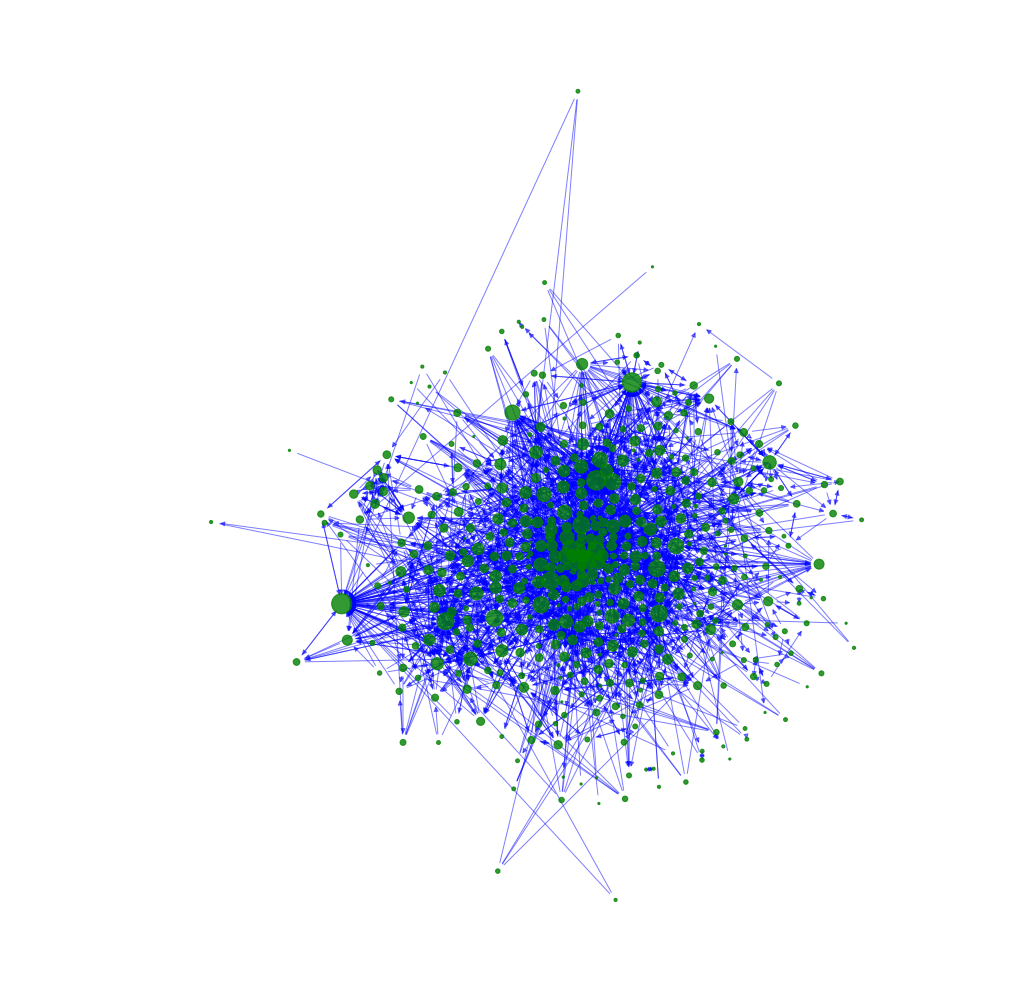

In [25]:
# Using force atlas configuration to achieve a pretty graph
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=False,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.5,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=1.0,
                        strongGravityMode=False,
                        gravity=40,

                        # Log
                        verbose=True)

plt.figure(figsize=(18,18)) 
positions = forceatlas2.forceatlas2_networkx_layout(DG, pos=None, iterations=2000)
nx.draw_networkx_nodes(DG, positions, node_size=[v*5 for v in list(d.values())], node_color=colors, alpha=0.8)
nx.draw_networkx_edges(DG, positions, edge_color=edge_colors, alpha=0.5)
plt.axis('off')
plt.show()

In [26]:
UG = DG.to_undirected()
d2 = dict(UG.degree)

100%|██████████| 2000/2000 [00:40<00:00, 49.75it/s]


BarnesHut Approximation  took  3.38  seconds
Repulsion forces  took  35.15  seconds
Gravitational forces  took  0.13  seconds
Attraction forces  took  0.34  seconds
AdjustSpeedAndApplyForces step  took  0.39  seconds


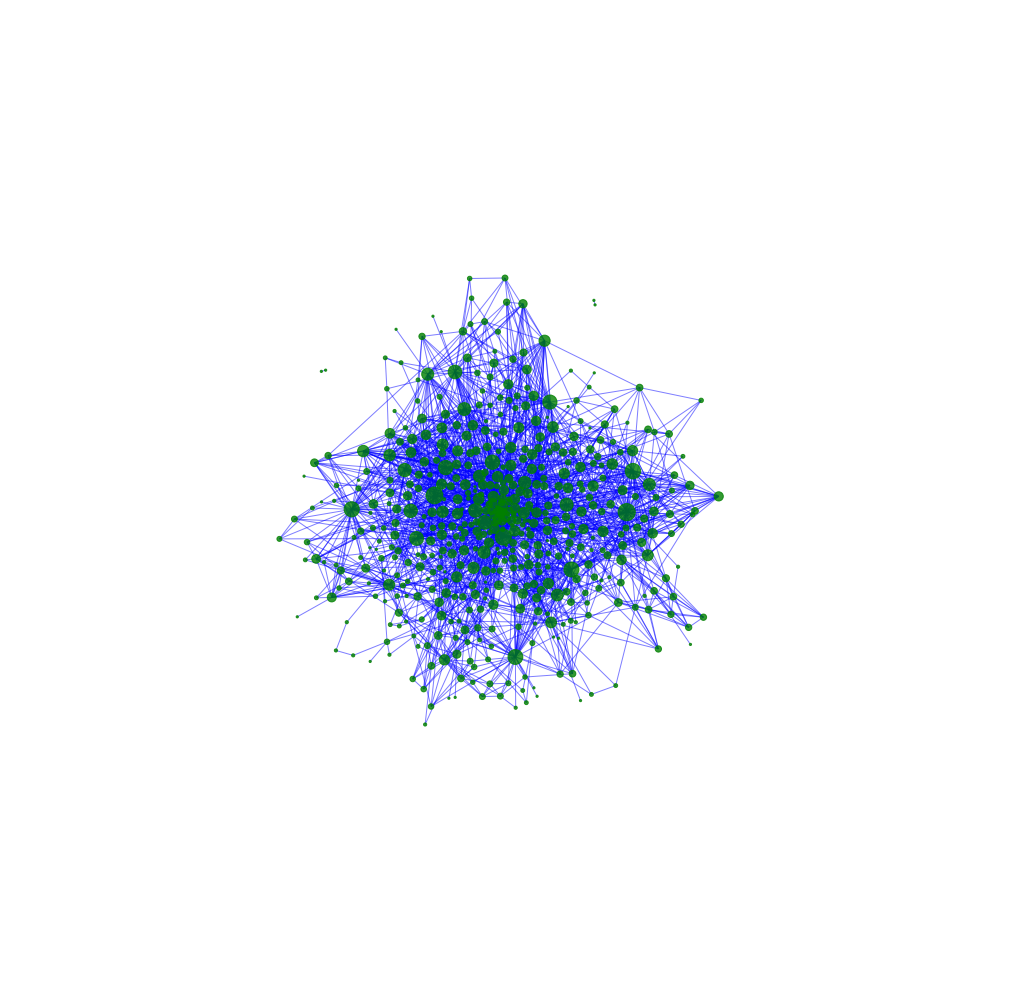

In [27]:
# Using force atlas configuration to achieve a pretty graph
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=False,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.5,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=1.0,
                        strongGravityMode=False,
                        gravity=40,

                        # Log
                        verbose=True)

plt.figure(figsize=(18,18)) 
positions = forceatlas2.forceatlas2_networkx_layout(UG, pos=None, iterations=2000)
nx.draw_networkx_nodes(UG, positions, node_size=[v*5 for v in list(d2.values())], node_color=colors, alpha=0.8)
nx.draw_networkx_edges(UG, positions, edge_color=edge_colors, alpha=0.5)
plt.axis('off')
plt.show()

In [28]:
len(UG.edges())

2542

In [29]:
# Top 5 most connected aesthetics in terms of in degree
sorted([
    {'name':x, 'value':DG.in_degree(x)} 
    for x,y in DG.nodes(data=True) 
], key=lambda k: k['value'],reverse=True)[0:20]

[{'name': 'Cottagecore', 'value': 56},
 {'name': 'Vaporwave', 'value': 55},
 {'name': 'Vintage', 'value': 48},
 {'name': 'Naturecore', 'value': 46},
 {'name': 'Cyberpunk', 'value': 42},
 {'name': 'Dark Academia', 'value': 42},
 {'name': 'Art Academia', 'value': 41},
 {'name': 'Pastel', 'value': 38},
 {'name': 'Kidcore', 'value': 37},
 {'name': 'Goth', 'value': 36},
 {'name': 'Grunge', 'value': 34},
 {'name': 'Synthwave', 'value': 33},
 {'name': 'Lo-Fi', 'value': 32},
 {'name': 'Glowwave', 'value': 30},
 {'name': 'Punk', 'value': 30},
 {'name': 'Animecore', 'value': 29},
 {'name': 'Light Academia', 'value': 28},
 {'name': 'Witchcore', 'value': 28},
 {'name': 'Baddie', 'value': 26},
 {'name': 'Goblincore', 'value': 25}]

In [30]:
#DG.in_edges('Cottagecore')

In [31]:
# Top 5 most connected aesthetics in terms of out degree
sorted([
    {'name':x, 'value':DG.out_degree(x)} 
    for x,y in DG.nodes(data=True) 
], key=lambda k: k['value'],reverse=True)[0:20]

[{'name': 'Milleniwave', 'value': 38},
 {'name': 'Cyberpunk', 'value': 33},
 {'name': 'Lo-Fi', 'value': 27},
 {'name': 'Cottagecore', 'value': 25},
 {'name': 'Witchcore', 'value': 25},
 {'name': 'Neo-Romanism', 'value': 24},
 {'name': 'Glowwave', 'value': 23},
 {'name': 'Rainbowcore', 'value': 21},
 {'name': 'Vaporwave', 'value': 21},
 {'name': 'Camp', 'value': 20},
 {'name': 'Dreamy', 'value': 20},
 {'name': 'Goth', 'value': 20},
 {'name': 'Modernism', 'value': 20},
 {'name': 'Grunge', 'value': 19},
 {'name': 'Nostalgiacore', 'value': 19},
 {'name': 'Bloomcore', 'value': 18},
 {'name': 'Dark Academia', 'value': 18},
 {'name': 'Cyberghetto', 'value': 17},
 {'name': 'Hot Topic', 'value': 17},
 {'name': 'Rainy Day', 'value': 17}]

In [32]:
# extraction of GCC and creation of the undirected version of the graph
largest_cc = max(nx.weakly_connected_components(DG), key=len)
DGCC = DG.subgraph(largest_cc)
UGCC = DGCC.to_undirected()

In [33]:
len(DGCC.nodes()), len(DGCC.edges())

(511, 3283)

In [34]:
len(UGCC.nodes()), len(UGCC.edges())

(511, 2540)

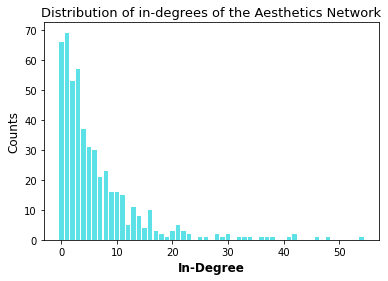

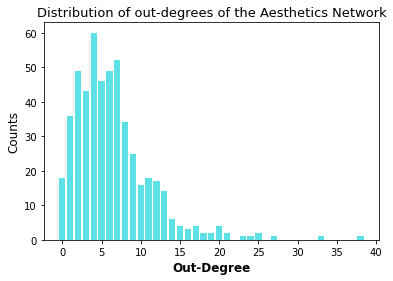

In [35]:
d_in=dict(DGCC.in_degree())
#Bar plot of the in-degree distribution
in_degrees=list(d_in.values())
v1 = np.arange(int(min(in_degrees)),int(max(in_degrees)))
count,bins=np.histogram(in_degrees,bins=v1)
plt.bar(bins[:-1], count,color='#5ce1e6')
plt.title('Distribution of in-degrees of the Aesthetics Network',fontsize=13)
plt.xlabel('In-Degree',fontsize=12,fontweight='bold')
plt.ylabel('Counts',fontsize=12)
plt.show() 

d_out=dict(DGCC.out_degree())
#Bar plot of the out-degree distribution
out_degrees=list(d_out.values())
v2 = np.arange(int(min(out_degrees)),int(max(out_degrees))+2)
count,bins=np.histogram(out_degrees,bins=v2)
plt.bar(bins[:-1], count,color='#5ce1e6')
plt.title('Distribution of out-degrees of the Aesthetics Network',fontsize=13)
plt.xlabel('Out-Degree',fontsize=12,fontweight='bold')
plt.ylabel('Counts',fontsize=12)
plt.show() 

In [41]:
baseurl = "https://aesthetics.fandom.com/api.php?"
action = "action=query"
content = "prop=extracts&exlimit=1&explaintext"
dataformat ="format=json"
tk = WordPunctTokenizer()

for file in DG:
    
    if file == "Mindcore":
        print(" ")
    else:
        char_file = file.replace('/','_')
        title = "titles="+urllib.parse.quote_plus(file)
        query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)
        wikiresponse = urllib.request.urlopen(query)
        wikidata = wikiresponse.read()
        wikitext = wikidata.decode('utf-8')

        pag_val=re.findall(r'\d+',str(json.loads(wikitext)['query']['pages'].keys()))

        clean = json.loads(wikitext)['query']['pages'][pag_val[0]]['extract']
        clean = re.sub('=+.*?=+','',re.sub('=+ Gallery.*','', re.sub('\t','',re.sub('\n','', clean))))

        ftk = tk.tokenize(clean.lower())

        ftk =[ tok for tok in ftk if tok.isalpha()]
        if file == "Coffee House/Cafe":
            char_file='Coffee House_Cafe'
        with open('clean/'+f'{char_file}.txt', 'w',encoding="utf-8") as f:
            f.write(' '.join([str(item) for item in ftk]))
    

In [42]:
#without stopwords
from gensim.parsing.preprocessing import remove_stopwords
from nltk.corpus import stopwords

baseurl = "https://aesthetics.fandom.com/api.php?"
action = "action=query"
content = "prop=extracts&exlimit=1&explaintext"
dataformat ="format=json"
tk = WordPunctTokenizer()

for file in DG:
    
    if file == "Mindcore":
        print(" ")
    else:
        char_file = file.replace('/','_')
        title = "titles="+urllib.parse.quote_plus(file)
        query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)
        wikiresponse = urllib.request.urlopen(query)
        wikidata = wikiresponse.read()
        wikitext = wikidata.decode('utf-8')

        pag_val=re.findall(r'\d+',str(json.loads(wikitext)['query']['pages'].keys()))

        clean = json.loads(wikitext)['query']['pages'][pag_val[0]]['extract']
        clean = re.sub('=+.*?=+','',re.sub('=+ Gallery.*','', re.sub('\t','',re.sub('\n','', clean))))

        ftk = tk.tokenize(clean.lower())

        ftk =[ tok for tok in ftk if tok.isalpha()]

        ftk = [tok for tok in ftk if not tok in stopwords.words()]

        with open('cleaner/'+f'{char_file}.txt', 'w',encoding="utf-8") as f:
            f.write(' '.join([str(item) for item in ftk]))
    

KeyboardInterrupt: 

### Summary

In [424]:
baseurl = "https://aesthetics.fandom.com/api.php?"
action = "action=query"
content = "prop=extracts&exlimit=1&explaintext"
dataformat ="format=json"
tk = WordPunctTokenizer()
check=['Junkpunk', 'Natural Philosophy', 'Shā mǎ tè', 'Spy fiction', 'Woodland Goth']
for file in DG:
    if file == "Mindcore":
        continue
    elif file in check:
        if file == 'Junkpunk':
            file='Salvagepunk'
        if file == 'Natural Philosophy':
            file='Green_Academia'
        if file == 'Spy fiction':
            file='Spy_Fiction'
        if file == 'Shā mǎ tè':
            file='Shamate'
        if file == 'Woodland Goth':
            file='Woodland_goth'
    else:
        char_file = file.replace('/','_')
        title = "titles="+urllib.parse.quote_plus(file)
        query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)
        wikiresponse = urllib.request.urlopen(query)
        wikidata = wikiresponse.read()
        wikitext = wikidata.decode('utf-8')

        pag_val=re.findall(r'\d+',str(json.loads(wikitext)['query']['pages'].keys()))

        clean = json.loads(wikitext)['query']['pages'][pag_val[0]]['extract']
        clean = re.split('=+.*?=+',clean)
        clean = [re.sub('\n','', i) for i in clean[0]]


        clean = ''.join(map(str, clean))
        with open('text_analysis/'+f'{char_file}.txt', 'w',encoding="utf-8") as f:
            f.write(clean)

In [39]:
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
import numpy as np
import networkx as nx
 
def read_article(file_name):
    with open('text_analysis/'+f'{file_name}.txt', 'r',encoding="utf-8") as f:
        clean=f.read()
    article = clean.split(". ")
    sentences1 = []

    for sentence in article:
#         print(sentence)
        sentences1.append(sentence.replace("[^a-zA-Z]", " ").split(" "))
    sentences1.pop() 
    
    for i in sentences1:
        if i == ['']:
            sentences1.remove(i)
            
    sentences=sentences1.copy()
    
    return sentences


In [40]:
def sentence_similarity(sent1, sent2, stopwords=None):
    if stopwords is None:
        stopwords = []
 
    sent1 = [w.lower() for w in sent1]
    sent2 = [w.lower() for w in sent2]
 
    all_words = list(set(sent1 + sent2))
 
    vector1 = [0] * len(all_words)
    vector2 = [0] * len(all_words)
 
    # build the vector for the first sentence
    for w in sent1:
        if w in stopwords:
            continue
        vector1[all_words.index(w)] += 1
 
    # build the vector for the second sentence
    for w in sent2:
        if w in stopwords:
            continue
        vector2[all_words.index(w)] += 1
    
    return 1 - cosine_distance(vector1, vector2)

In [41]:
def build_similarity_matrix(sentences, stop_words):
    # Create an empty similarity matrix
    similarity_matrix = np.zeros((len(sentences), len(sentences)))
 
    for idx1 in range(len(sentences)):
        for idx2 in range(len(sentences)):
            if idx1 == idx2: #ignore if both are same sentences
                continue 
            similarity_matrix[idx1][idx2] = sentence_similarity(sentences[idx1], sentences[idx2], stop_words)

    return similarity_matrix

In [42]:
def generate_summary(file_name, top_n=2):
    stop_words = stopwords.words('english')
    summarize_text = []

    # Step 1 - Read text anc split it
    sentences =  read_article(file_name)

    # Step 2 - Generate Similary Martix across sentences
    sentence_similarity_martix = build_similarity_matrix(sentences, stop_words)
    
    # Step 3 - Rank sentences in similarity martix
    sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_martix)
    scores = nx.pagerank(sentence_similarity_graph,max_iter=500000)
    
    # Step 4 - Sort the rank and pick top sentences
    ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)    
#     print("Indexes of top ranked_sentence order are ", ranked_sentence)   
    
    if len(ranked_sentence) < top_n:
        top_n=len(ranked_sentence)
    
    for i in range(top_n):
        summarize_text.append(" ".join(ranked_sentence[i][1]))
    
    return summarize_text
    # Step 5 - Offcourse, output the summarize texr
#     print("Summarize Text: \n", ". ".join(summarize_text))


In [436]:
# ["Mindcore","Ballet Academia","Bogan","Bunnycore","Cowpunk","Dazecore","Expressionism","Fairy Tale",
#                "Freak","Functionalism","Horror","Ironpunk","Joyride","Junkpunk","Kidcore","Macaute","Modernism","Nanopunk",
#                "Natural Philosophy","Neo-Romanism","Nowpunk","Nozems","Petcore","Pirate","Pointillism","Postmodernism",
#                 "Progressive Academia","Queer Academia","Rangercore","Romantic Goth","Scuttlers","Shanzhai","Shā mǎ tè","Soggy",
#                "Soulboys","Spy fiction","Stimwave","Victorian","Victorian Goth","Vintage","Wandervogel","Wizardcore",
#                 "Woodland Goth","Zazou","Zef","Zombiecore","70s Disco"]:

for file in DG:  
    char_file = file.replace('/','_')
    print(char_file)
    if file in ["Mindcore","Horror"]:
        continue
    else:   
        txt_sum=generate_summary(char_file,2)
        txt_sum_final=""
        delimiter=". "
        txt_sum_final=delimiter.join(txt_sum)

        with open('text_sum/'+f'{char_file}.txt', 'w',encoding="utf-8") as f:
            f.write(txt_sum_final)
        

Abstract
Abstract Tech
Acid Pixie
Acidwave
Adventurecore
Afrofuturism
Afro-Victorian
After Hours
Agropeople
Alien
Alternative
Americana
American Pioneers
American Revolution
Androgynous
Anemoiacore
Angelcore
Anglocore
Anglo Gothic
Angura Kei
Animecore
Anti-Fashion
Applecore
Art Academia
Arts and Crafts Movement
Art Deco
Art Hoe
Art Nouveau
Artistiekelingen
Athlete
Atompunk
Auroracore
Autumn
Avant-garde
Babycore
Babygirl
Barbiecore
Bardcore
Baddie
Ballet Academia
Baroque
Bastardcore
Beatnik
Bibliopunk
Biker
Bills
Bimbo Casual
Biopunk
Bizarro Fiction
Blob Web
Bloomcore
Bodikon
Bogan
Bohemian
Bombacore
Bosozoku
Boujee
Breakcore
Brocore
Bronzepunk
Britpop
Bubble Goth
Bubblegum Bitch
Bubblegum Witch
Bunnycore
Butterfly
Cabincore
Cagole
Camp
Campcore
Candycore
Caninecore
Carcore
Cargopunk
Carnivalcore
Cartelcore
Cartooncore
Casino
Cassette Futurism
Changelingcore
Chav
Cherry Emoji Twitter
Chic Modernist
Cholo
Christcore
Christian Girl Autumn
Christmas
Chaotic Academia
City Pop
Classic Academ

In [437]:
stop_words = stopwords.words('english')
char_file='Horror'
top_n=2
summarize_text = []
with open('text_analysis/'+f'{char_file}.txt', 'r',encoding="utf-8") as f:
    clean=f.read()
    article = clean.split(".")
    sentences = []

    for sentence in article:
#         print(sentence)
        sentences.append(sentence.replace("[^a-zA-Z]", " ").split(" "))
#     sentences.pop() 
    
        
    for i in sentences:
        if i == ['']:
            sentences.remove(i)

# sentences=read_article(char_file)
sum_sentences=[]
sentence_similarity_martix = build_similarity_matrix(sentences, stop_words)
sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_martix)
scores = nx.pagerank(sentence_similarity_graph,max_iter=600)
ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)
sum_sentences.append(ranked_sentence[0][1])
sum_sentences.append(ranked_sentence[1][1])

# for i in range(top_n):
summarize_text.append(" ".join(sum_sentences[0]))
summarize_text.append(" ".join(sum_sentences[1]))
        
txt_sum_final=""
delimiter=". "
txt_sum_final=delimiter.join(summarize_text)

with open('text_sum/'+f'{char_file}.txt', 'w',encoding="utf-8") as f:
    f.write(txt_sum_final)

### LabMT and VADER

In [50]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from operator import itemgetter, attrgetter
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import statistics
import matplotlib.pyplot as plt
import json

In [37]:
baseurl = "https://aesthetics.fandom.com/api.php?"
action = "action=query"
content = "prop=extracts&exlimit=1&explaintext"
dataformat ="format=json"
tk = WordPunctTokenizer()

for file in DG:
    
        char_file = file.replace('/','_')
        title = "titles="+urllib.parse.quote_plus(file)
        query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)
        wikiresponse = urllib.request.urlopen(query)
        wikidata = wikiresponse.read()
        wikitext = wikidata.decode('utf-8')

        pag_val=re.findall(r'\d+',str(json.loads(wikitext)['query']['pages'].keys()))

        clean = json.loads(wikitext)['query']['pages'][pag_val[0]]['extract']
        clean = re.split('=+.*?=+',clean)
        clean = [re.sub('\n','', i) for i in clean]
        clean = '.'.join(map(str, clean))
        with open('sentiment/'+f'{char_file}.txt', 'w',encoding="utf-8") as f:
            f.write(clean)

In [ ]:
#loading labMT as a df
df_lab = pd.read_csv('labMT.csv',sep=';')
df_lab

In [122]:
char_file

'Junkpunk'

In [126]:
stop_words = list(set(stopwords.words('english')))
char_hap = []
char_vad=[]
lemmatizer = WordNetLemmatizer()

for i in DG:
    if i == "Mindcore":
        continue
    else:
        char_file=i.replace('/','_')
        text_words = []
        with open('sentiment/'+f'{char_file}.txt', 'r',encoding="utf-8") as f:
            clean=f.read()
            sent_text = nltk.sent_tokenize(clean)
            tokenized_text = nltk.word_tokenize(clean)

            for i in tokenized_text:
                if i in stop_words or not i.isalpha():
                    tokenized_text.remove(i)
                else:
                    text_words.append(lemmatizer.lemmatize(i.lower()))

    #Calculating the LabMT score for each aesthetic 
        sent_avg = 0 
        count = 0
        for i in text_words:
            try:            
                if i in df_lab.word.to_list():
                    sent_avg+=float(df_lab.loc[df_lab['word']==i]['happiness_average'].to_string(index=False))
                    count+=1
            except:
                continue
        if count != 0:
            sent_avg/=count
            char_hap.append((char_file,sent_avg))
        else:
            char_hap.append((char_file,0))

    #Calculating the Vader score for each aesthetic 
        analyzer = SentimentIntensityAnalyzer()
        sent_comp = 0 
        count = 0
        for i in sent_text:
            try:
                vs = analyzer.polarity_scores(i)
                sent_comp+=vs['compound']
                count+=1
            except:
                continue
        if count != 0:
            sent_comp/=count
            char_vad.append((char_file,sent_comp))
        else:
            char_vad.append((char_file,0))


In [128]:
char_vad2=sorted(char_vad, key=itemgetter(1),reverse=True)
happiest_char=char_vad2[0:10]

print("The 10 happiest characters are \n")
print(happiest_char)

The 10 happiest characters are 

[('Bunnycore', 0.906), ('Miami Metro', 0.768), ('Lagenlook', 0.7191666666666667), ('Snowdrop', 0.6938749999999999), ('Romantic Goth', 0.6900999999999999), ('Scrapbook', 0.6828714285714286), ('Ethereal', 0.6662250000000001), ('Nanopunk', 0.6649499999999999), ('Summer', 0.66422), ('Happycore', 0.6529166666666666)]


In [129]:
char_hap2=sorted(char_hap, key=itemgetter(1),reverse=True)
happiest_char=char_hap2[0:10]

print("The 10 happiest characters are \n")
print(happiest_char)

The 10 happiest characters are 

[('Bookstore Girl', 6.612), ('Glam Girl', 6.411333333333334), ('Ukiyo-e', 6.369600000000002), ('Plant Mom', 6.296349206349202), ('Lagenlook', 6.279545454545453), ('Spring', 6.257209302325583), ('Pixel Cutie', 6.2496), ('Magenta', 6.2441666666666675), ('Romantic Italian', 6.213731343283582), ('Fairy Academia', 6.189600000000006)]


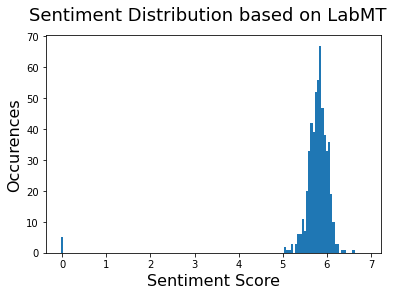

In [131]:
minimum=char_hap2[-1][1]
maximum=char_hap2[0][1]

char_labmt=[]

for i in range(len(char_hap)):
    char_labmt.append(char_hap[i][1])

b = np.array(np.arange(minimum,maximum+0.3,0.05))
hist,bins = np.histogram(char_labmt,b)
 
fig = plt.figure()
bar = plt.bar(b[:-1],hist,width=0.05)
fig.suptitle('Sentiment Distribution based on LabMT', fontsize=18)
plt.xlabel('Sentiment Score', fontsize=16)
plt.ylabel('Occurences', fontsize=16)
plt.show()

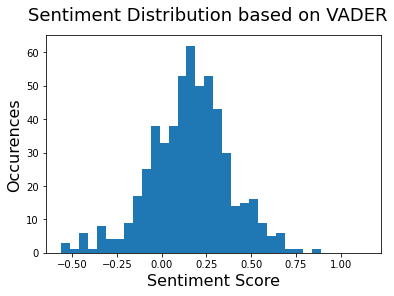

In [132]:
minimum=char_vad2[-1][1]
maximum=char_vad2[0][1]

char_vad3=[]

for i in range(len(char_vad)):
    char_vad3.append(char_vad[i][1])

b = np.array(np.arange(minimum,maximum+0.3,0.05))
hist,bins = np.histogram(char_vad3,b)
 
fig = plt.figure()
bar = plt.bar(b[:-1],hist,width=0.05)
fig.suptitle('Sentiment Distribution based on VADER', fontsize=18)
plt.xlabel('Sentiment Score', fontsize=16)
plt.ylabel('Occurences', fontsize=16)
plt.show()

In [133]:
null_char=[]
for i in char_hap:
    if i[1]==0:
        null_char.append(i[0])

In [134]:
null_char

['Junkpunk', 'Natural Philosophy', 'Shā mǎ tè', 'Spy fiction', 'Woodland Goth']

In [ ]:
['Junkpunk', 'Natural Philosophy', 'Shā mǎ tè', 'Spy fiction', 'Woodland Goth']
['Salvagepunk','Green_Academia','Shamate','Spy_Fiction','Woodland_goth']